In the first submission, I trained a linear regression model with nulls being replaced with 0's for all the columns. In this submission, I want modify the data and train Linear Regression, Lasso Regression with Ridge Regression.

In this submission, for out patients column I will be using the mean difference between the present and past to replace with null values. For this to happen, I need to calculate all the mean differences where there are no nulls in the present and past columns.

As part of this submission, I will not be touching the replacing nulls with 0 for conditions columns.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json


In [5]:
with open('healthcare-claims-prediction_kaggel/patient_data_train.json', 'r') as file:
    train_data_json = json.load(file)
with open('healthcare-claims-prediction_kaggel/patient_data_test.json', 'r') as file:
    test_data_json = json.load(file)

train_claims = pd.read_csv('healthcare-claims-prediction_kaggel/train.csv')

def normalize_and_clean_data(data):
    '''
    Normalizing and handling the data
    '''
    import warnings
    warnings.filterwarnings("ignore")
    df = pd.json_normalize(data)

    # each patient is unique record,i will be replacing nulls with 0 values

    # so First we will do this for the features related to past years

    df["Conditions.HD"].fillna(0,inplace=True)

    df["Conditions.HT"].fillna(0,inplace=True)

    df["Conditions.DB"].fillna(0,inplace=True)

    df["Conditions.AT"].fillna(0,inplace=True)

    return df

train_data = normalize_and_clean_data(train_data_json)
test_data = normalize_and_clean_data(test_data_json)
    # As we already know, we have only 5 past years to handle the values
    # Now, we need to do the similar kind of analysis for conditions features as well.



In [8]:
train_data = pd.merge(train_data, train_claims, on='PatientID')
train_data

PatientID Sex  Age  Conditions.HD  Conditions.HT  \
0         100041   M   79            4.0            2.0   
1         100179   F   71            1.0            1.0   
2         100210   F   84            4.0            1.0   
3         100794   M   67            1.0            0.0   
4         101629   M   72            2.0            1.0   
...          ...  ..  ...            ...            ...   
14624    7049984   F   78            0.0            3.0   
14625    7050524   F   78            0.0            2.0   
14626    7051050   M   80            0.0            2.0   
14627    7052885   M   66            4.0            0.0   
14628    7052987   M   75            0.0            4.0   

       Out patient costs.2023  Out patient costs.2022  Out patient costs.2021  \
0                     17312.0                 16769.0                 16226.0   
1                     14028.0                 12292.0                 10557.0   
2                     24653.0                 30431.0                 31393.0   
3                      5113.0                     NaN                     NaN   
4                     15652.0                 14150.0                 12376.0   
...                       ...                     ...                     ...   
14624                 10779.0                 10284.0                  9794.0   
14625                 15964.0                 15236.0                 14516.0   
14626                 11477.0                 11326.0                 10964.0   
14627                     NaN                     NaN                     NaN   
14628                 11958.0                 11163.0                 10367.0   

       Out patient costs.2020  Out patient costs.2019  Conditions.DB  \
0                     15522.0                 14819.0            0.0   
1                      8936.0                  7316.0            1.0   
2                     32357.0                 32206.0            4.0   
3                         NaN                     NaN            3.0   
4                     10602.0                  8982.0            1.0   
...                       ...                     ...            ...   
14624                  9306.0                  8723.0            2.0   
14625                 13797.0                 12939.0            2.0   
14626                 10603.0                 10135.0            3.0   
14627                     NaN                     NaN            3.0   
14628                  9567.0                  8768.0            0.0   

       Conditions.AT  TotalClaims  
0                0.0        28424  
1                0.0        22212  
2                2.0        44841  
3                0.0        16506  
4                0.0        25796  
...              ...          ...  
14624            0.0        20805  
14625            4.0        35728  
14626            0.0        21804  
14627            3.0        38917  
14628            4.0        45027  

[14629 rows x 13 columns]

 visulaise the outpatient columns.

In [11]:
train_data.isnull().sum()

PatientID                    0
Sex                          0
Age                          0
Conditions.HD                0
Conditions.HT                0
Out patient costs.2023     748
Out patient costs.2022    1538
Out patient costs.2021    2278
Out patient costs.2020    3060
Out patient costs.2019    3857
Conditions.DB                0
Conditions.AT                0
TotalClaims                  0
dtype: int64

Now,

for nulls in Out patient costs.2023 col I will replacing with mean.

for nulls in Out patient costs.2022 col, I will be averaging the difference in existing values of 2023 and 2022 and substracting the 2023 value with the average one and will replace it.

for nulls in Out patient costs.2021 col, I will be averaging the difference in existing values of 2022 and 2021 and substracting the 2022 value with the average one and will replace it.

for nulls in Out patient costs.2020 col, I will be averaging the difference in existing values of 2021 and 2020 and substracting the 2021 value with the average one and will replace it.

for nulls in Out patient costs.2019 col, I will be averaging the difference in existing values of 2020 and 2019 and substracting the 2020 value with the average one and will replace it.


In [14]:
def fill_na_respectively(row, x, mean_val, feature_1, feature_2):
    
    if pd.isna(row[feature_2]):
        if pd.isna(row[feature_1]):
            row[feature_2] = mean_val
        else:
            row[feature_2] = row[feature_1] - x
    return row

respective_dif = {}

def find_dif(df, feature_1, feature_2):
    df_filtered = df.dropna(subset=[feature_1, feature_2])
    df_features2 = df.dropna(subset=[feature_2])
    name = feature_1 + feature_2
    df_filtered["difference"] = df_filtered[feature_1] - df_filtered[feature_2]
    respective_dif[name] = df_filtered["difference"].mean()




In [16]:
# Finding difference between 2022 and 2023
feature_1 = "Out patient costs.2023"
feature_2 = "Out patient costs.2022"
find_dif(train_data, feature_1, feature_2)

# Finding difference between 2021 and 2022
feature_1 = "Out patient costs.2022"
feature_2 = "Out patient costs.2021"
find_dif(train_data, feature_1, feature_2)


# Finding difference between 2021 and 2020
feature_1 = "Out patient costs.2021"
feature_2 = "Out patient costs.2020"
find_dif(train_data, feature_1, feature_2)

# Finding difference between 2020 and 2019
feature_1 = "Out patient costs.2020"
feature_2 = "Out patient costs.2019"
find_dif(train_data, feature_1, feature_2)

print(respective_dif)

{'Out patient costs.2023Out patient costs.2022': 554.1553739210144, 'Out patient costs.2022Out patient costs.2021': 795.3071006396243, 'Out patient costs.2021Out patient costs.2020': 885.4191373498142, 'Out patient costs.2020Out patient costs.2019': 989.3945414036391}


In [18]:
# Before filling rest of the cols, I will be filling the 2023 column
mean_values = train_data["Out patient costs.2023"].mean()
train_data["Out patient costs.2023"] = train_data["Out patient costs.2023"].fillna(mean_values)


# Filling null values in 2022 column
feature_1 = "Out patient costs.2023"
feature_2 = "Out patient costs.2022"
name = feature_1 + feature_2
mean_val = train_data[feature_2].mean()
train_data = train_data.apply(lambda row: fill_na_respectively(row, respective_dif[name], mean_val, feature_1, feature_2), axis=1)


# Filling null values in 2021 column
feature_1 = "Out patient costs.2022"
feature_2 = "Out patient costs.2021"
name = feature_1 + feature_2
mean_val = train_data[feature_2].mean()
train_data = train_data.apply(lambda row: fill_na_respectively(row, respective_dif[name], mean_val, feature_1, feature_2), axis=1)

# Filling null values in 2020 column
feature_1 = "Out patient costs.2021"
feature_2 = "Out patient costs.2020"
name = feature_1 + feature_2
mean_val = train_data[feature_2].mean()
train_data = train_data.apply(lambda row: fill_na_respectively(row, respective_dif[name], mean_val, feature_1, feature_2), axis=1)


# Filling null values in 2019 column
feature_1 = "Out patient costs.2020"
feature_2 = "Out patient costs.2019"
name = feature_1 + feature_2
mean_val = train_data[feature_2].mean()
train_data = train_data.apply(lambda row: fill_na_respectively(row, respective_dif[name], mean_val, feature_1, feature_2), axis=1)

In [20]:
# Repeating the same for the test data

# Before filling rest of the cols, I will be filling the 2023 column
mean_values = train_data["Out patient costs.2023"].mean()
test_data["Out patient costs.2023"] = test_data["Out patient costs.2023"].fillna(mean_values)


# Filling null values in 2022 column
feature_1 = "Out patient costs.2023"
feature_2 = "Out patient costs.2022"
name = feature_1 + feature_2
mean_val = train_data[feature_2].mean()
test_data = test_data.apply(lambda row: fill_na_respectively(row, respective_dif[name], mean_val, feature_1, feature_2), axis=1)


# Filling null values in 2021 column
feature_1 = "Out patient costs.2022"
feature_2 = "Out patient costs.2021"
name = feature_1 + feature_2
mean_val = train_data[feature_2].mean()
test_data = test_data.apply(lambda row: fill_na_respectively(row, respective_dif[name], mean_val, feature_1, feature_2), axis=1)

# Filling null values in 2020 column
feature_1 = "Out patient costs.2021"
feature_2 = "Out patient costs.2020"
name = feature_1 + feature_2
mean_val = train_data[feature_2].mean()
test_data = test_data.apply(lambda row: fill_na_respectively(row, respective_dif[name], mean_val, feature_1, feature_2), axis=1)


# Filling null values in 2019 column
feature_1 = "Out patient costs.2020"
feature_2 = "Out patient costs.2019"
name = feature_1 + feature_2
mean_val = train_data[feature_2].mean()
test_data = test_data.apply(lambda row: fill_na_respectively(row, respective_dif[name], mean_val, feature_1, feature_2), axis=1)

In [22]:
train_data.isnull().sum()


PatientID                 0
Sex                       0
Age                       0
Conditions.HD             0
Conditions.HT             0
Out patient costs.2023    0
Out patient costs.2022    0
Out patient costs.2021    0
Out patient costs.2020    0
Out patient costs.2019    0
Conditions.DB             0
Conditions.AT             0
TotalClaims               0
dtype: int64

Now,we have successfully replaced the null values with the avergae values.

<Axes: xlabel='Out patient costs.2023', ylabel='Count'>

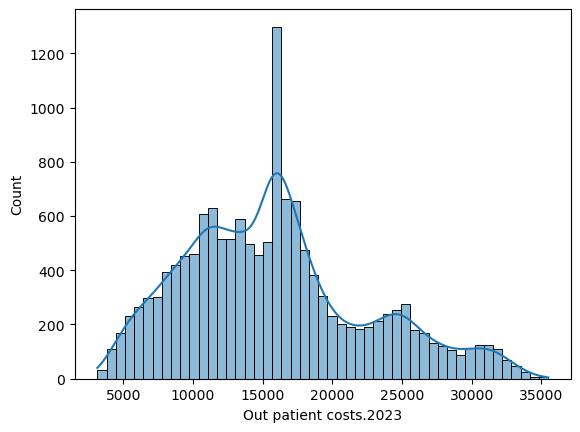

In [14]:
sns.histplot(train_data["Out patient costs.2023"],kde=True)

<Axes: xlabel='Out patient costs.2022', ylabel='Count'>

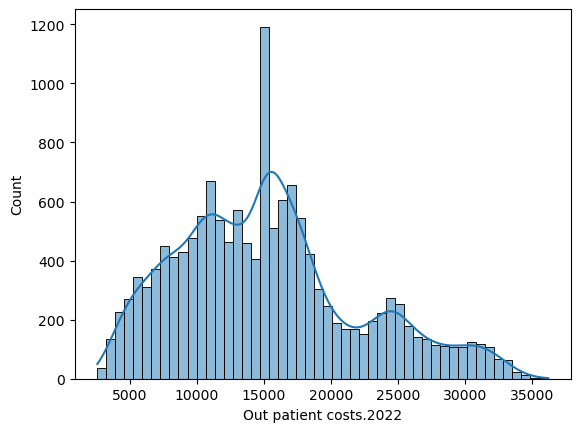

In [15]:
sns.histplot(train_data["Out patient costs.2022"],kde=True)

<Axes: xlabel='Out patient costs.2021', ylabel='Count'>

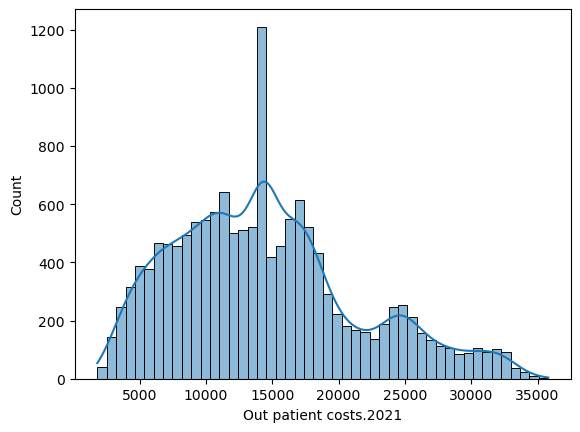

In [16]:
sns.histplot(train_data["Out patient costs.2021"],kde=True)

<Axes: xlabel='Out patient costs.2020', ylabel='Count'>

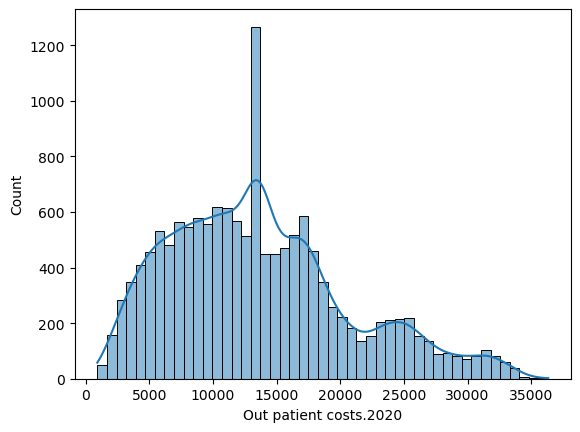

In [17]:
sns.histplot(train_data["Out patient costs.2020"],kde=True)

<Axes: xlabel='Out patient costs.2019', ylabel='Count'>

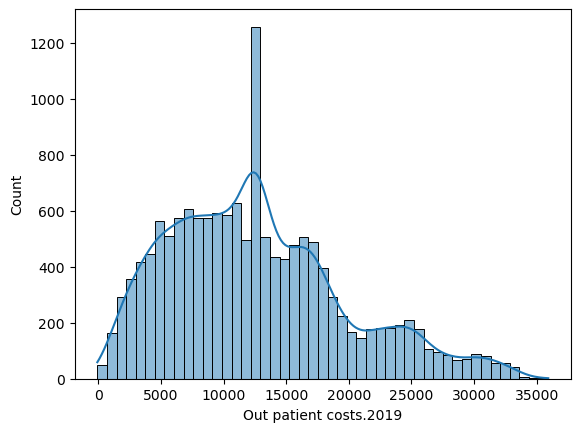

In [18]:
sns.histplot(train_data["Out patient costs.2019"],kde=True)

Compared to previous submission plots where 0 has the highest frequency, now the frequency got shifted and need to check the performance of the model.

In [20]:
trian_ID_col = train_data[["PatientID"]]
train_data.drop(["PatientID"],axis=1,inplace=True)
test_ID_col = test_data[["PatientID"]]
test_data.drop(["PatientID"], axis=1,inplace=True)

In [21]:
train_data.drop(["Sex"],axis=1).corr()

Age  Conditions.HD  Conditions.HT  \
Age                     1.000000       0.004649       0.004198   
Conditions.HD           0.004649       1.000000      -0.102849   
Conditions.HT           0.004198      -0.102849       1.000000   
Out patient costs.2023  0.536613       0.430491       0.001576   
Out patient costs.2022  0.622524       0.402638       0.002480   
Out patient costs.2021  0.668608       0.378402       0.004009   
Out patient costs.2020  0.703528       0.356723       0.005621   
Out patient costs.2019  0.729576       0.338094       0.007505   
Conditions.DB          -0.003114      -0.105135      -0.113834   
Conditions.AT          -0.010463      -0.114855      -0.111116   
TotalClaims             0.182427       0.351597       0.111901   

                        Out patient costs.2023  Out patient costs.2022  \
Age                                   0.536613                0.622524   
Conditions.HD                         0.430491                0.402638   
Conditions.HT                         0.001576                0.002480   
Out patient costs.2023                1.000000                0.985939   
Out patient costs.2022                0.985939                1.000000   
Out patient costs.2021                0.968622                0.995725   
Out patient costs.2020                0.946869                0.985820   
Out patient costs.2019                0.927356                0.974197   
Conditions.DB                         0.138334                0.130798   
Conditions.AT                         0.204924                0.192165   
TotalClaims                           0.533819                0.508002   

                        Out patient costs.2021  Out patient costs.2020  \
Age                                   0.668608                0.703528   
Conditions.HD                         0.378402                0.356723   
Conditions.HT                         0.004009                0.005621   
Out patient costs.2023                0.968622                0.946869   
Out patient costs.2022                0.995725                0.985820   
Out patient costs.2021                1.000000                0.996802   
Out patient costs.2020                0.996802                1.000000   
Out patient costs.2019                0.990324                0.998022   
Conditions.DB                         0.123886                0.118599   
Conditions.AT                         0.181276                0.171786   
TotalClaims                           0.487426                0.468255   

                        Out patient costs.2019  Conditions.DB  Conditions.AT  \
Age                                   0.729576      -0.003114      -0.010463   
Conditions.HD                         0.338094      -0.105135      -0.114855   
Conditions.HT                         0.007505      -0.113834      -0.111116   
Out patient costs.2023                0.927356       0.138334       0.204924   
Out patient costs.2022                0.974197       0.130798       0.192165   
Out patient costs.2021                0.990324       0.123886       0.181276   
Out patient costs.2020                0.998022       0.118599       0.171786   
Out patient costs.2019                1.000000       0.114029       0.163693   
Conditions.DB                         0.114029       1.000000      -0.097261   
Conditions.AT                         0.163693      -0.097261       1.000000   
TotalClaims                           0.452143       0.368768       0.370070   

                        TotalClaims  
Age                        0.182427  
Conditions.HD              0.351597  
Conditions.HT              0.111901  
Out patient costs.2023     0.533819  
Out patient costs.2022     0.508002  
Out patient costs.2021     0.487426  
Out patient costs.2020     0.468255  
Out patient costs.2019     0.452143  
Conditions.DB              0.368768  
Conditions.AT              0.370070  
TotalClaims                1.000000

<Axes: >

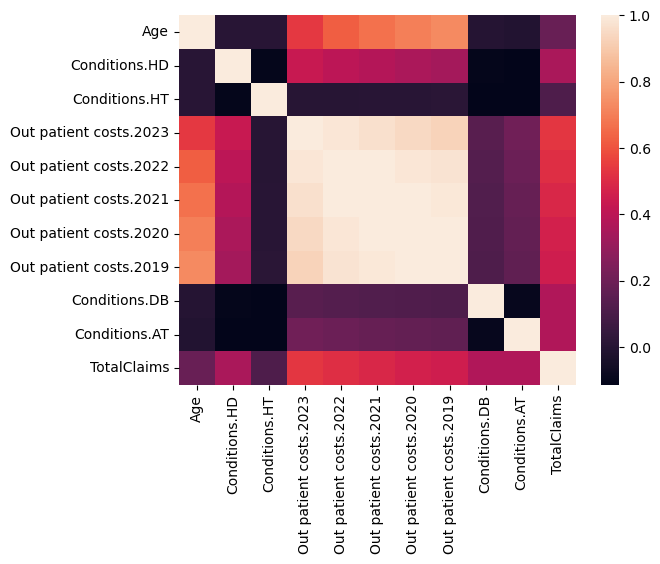

In [22]:
sns.heatmap(train_data.drop(["Sex"],axis=1).corr())

In [25]:
# converting Sex column into quantitative
from sklearn.preprocessing import LabelEncoder

sc = LabelEncoder()
sc.fit(train_data["Sex"])
train_data["Sex"] = sc.transform(train_data["Sex"])
test_data["Sex"] = sc.transform(test_data["Sex"])

In [27]:
test_data

PatientID  Sex  Age  Conditions.AT  Conditions.DB  Conditions.HD  \
0       7053446    0   69            2.0            2.0            5.0   
1       7054536    1   70            0.0            4.0            0.0   
2       7055023    0   71            2.0            0.0            2.0   
3       7055403    1   75            1.0            0.0            4.0   
4       7055459    1   73            0.0            2.0            0.0   
...         ...  ...  ...            ...            ...            ...   
6266    9996673    0   70            2.0            2.0            0.0   
6267    9998161    0   84            0.0            2.0            1.0   
6268    9998756    1   71            2.0            0.0            3.0   
6269    9998997    0   75            0.0            2.0            1.0   
6270    9999900    1   66            0.0            0.0            2.0   

      Conditions.HT  Out patient costs.2023  Out patient costs.2022  \
0               2.0            15035.000000            13054.000000   
1               2.0             6075.000000             5306.000000   
2               1.0            14094.000000            12349.000000   
3               0.0            16496.000000            15318.000000   
4               1.0             8109.000000             7415.000000   
...             ...                     ...                     ...   
6266            1.0             8548.000000             7423.000000   
6267            1.0            17952.000000            22496.000000   
6268            0.0            11797.000000            10395.000000   
6269            1.0            18822.000000            17566.000000   
6270            4.0            15796.209351            15242.053977   

      Out patient costs.2021  Out patient costs.2020  Out patient costs.2019  
0               11076.000000            10190.580863             9201.186321  
1                4603.000000             3900.000000             2910.605459  
2               10605.000000             8975.000000             7347.000000  
3               14140.000000            12956.000000            11771.000000  
4                6721.000000             5902.000000             5082.000000  
...                      ...                     ...                     ...  
6266             6371.000000             5321.000000             4331.605459  
6267            23252.000000            24010.000000            23891.000000  
6268             8994.000000             7714.000000             6434.000000  
6269            16311.000000            14972.000000            13635.000000  
6270            14446.746876            13561.327739            12571.933198  

[6271 rows x 12 columns]

In [24]:
x = train_data.drop(["TotalClaims"],axis=1)
y = train_data[["TotalClaims"]]

In [25]:
# These lines are making both the features in simlar order

temp = test_data[["Conditions.AT","Conditions.DB"]]
test_data.drop(["Conditions.AT","Conditions.DB"], axis=1, inplace=True)
test_data["Conditions.DB"] = temp["Conditions.DB"]
test_data["Conditions.AT"] = temp["Conditions.AT"]

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=25)

In [27]:
# Sclaing the data

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)
test_data = sc.transform(test_data)

In [2]:
test_data

NameError: name 'test_data' is not defined

In [28]:
x_train.shape

(10240, 11)

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
!pip install catboost

In [31]:
!pip install lightgbm

In [32]:
!pip install optuna


In [ ]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
import optuna

# Assume x_train, y_train, x_test, y_test, test_data, and test_ID_col are already defined

# Feature Scaling and Polynomial Feature Engineering
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_poly)
x_test_scaled = scaler.transform(x_test_poly)

# Define XGBoost, CatBoost, and LightGBM for stacking
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
lgbm_model = LGBMRegressor(objective='regression', random_state=42)

# Optuna for Hyperparameter Tuning with Early Stopping based on MAE
def objective(trial):
    xgb_params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 5)
    }
    
    catboost_params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1)
    }
    
    lgbm_params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 5)
    }
    
    # Define models with trial parameters
    xgb_tuned = XGBRegressor(**xgb_params, objective='reg:squarederror', random_state=42)
    catboost_tuned = CatBoostRegressor(**catboost_params, random_state=42, verbose=0)
    lgbm_tuned = LGBMRegressor(**lgbm_params, objective='regression', random_state=42)
    
    # Stacking with GradientBoostingRegressor as meta-model
    meta_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)
    
    stacking_model = StackingRegressor(
        estimators=[
            ('xgb', xgb_tuned), 
            ('catboost', catboost_tuned),
            ('lgbm', lgbm_tuned)
        ],
        final_estimator=meta_model,
        cv=KFold(n_splits=5, shuffle=True, random_state=42),
        n_jobs=-1
    )
    
    # Fit the stacking model
    stacking_model.fit(x_train_scaled, y_train)
    
    # Predict and evaluate
    y_pred_test = stacking_model.predict(x_test_scaled)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    # Early stopping based on achieving target MAE
    if test_mae <= 400:
        trial.study.stop()  # Stop trials if target MAE is reached
    
    return test_mae

# Optuna study with early stopping
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

# Best trial
print(f"excution started")
best_trial = study.best_trial
#we are getting error at this part did understand what the error is 
'''print(f"Best MAE: {best_trial.value}")
print(f"Best params: {best_trial.params}")'''

'''# Using best parameters to build final models
xgb_final = XGBRegressor(**best_trial.params['xgb'], objective='reg:squarederror', random_state=42)
catboost_final = CatBoostRegressor(**best_trial.params['catboost'], random_state=42, verbose=0)
lgbm_final = LGBMRegressor(**best_trial.params['lgbm'], objective='regression', random_state=42)

# Fit final stacking model
meta_model_final = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42)

stacking_final = StackingRegressor(
    estimators=[
        ('xgb', xgb_final), 
        ('catboost', catboost_final),
        ('lgbm', lgbm_final)
    ],
    final_estimator=meta_model_final,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)'''

# Best trial obtained from the study
best_trial = study.best_trial
print(f"Best MAE: {best_trial.value}")
print(f"Best params: {best_trial.params}")

# Using the best parameters to build final models directly from best_trial.params
#i did not understand why we are usinmg these lines again
xgb_final = XGBRegressor(
    n_estimators=best_trial.params['n_estimators'],
    learning_rate=best_trial.params['learning_rate'],
    max_depth=best_trial.params['max_depth'],
    subsample=best_trial.params['subsample'],
    colsample_bytree=best_trial.params['colsample_bytree'],
    reg_lambda=best_trial.params['reg_lambda'],
    reg_alpha=best_trial.params['reg_alpha'],
    objective='reg:squarederror',
    random_state=42
)

catboost_final = CatBoostRegressor(
    iterations=best_trial.params['iterations'],
    learning_rate=best_trial.params['learning_rate'],
    depth=best_trial.params['depth'],
    l2_leaf_reg=best_trial.params['l2_leaf_reg'],
    bagging_temperature=best_trial.params['bagging_temperature'],
    random_state=42,
    verbose=0
)

lgbm_final = LGBMRegressor(
    n_estimators=best_trial.params['n_estimators'],
    learning_rate=best_trial.params['learning_rate'],
    max_depth=best_trial.params['max_depth'],
    subsample=best_trial.params['subsample'],
    colsample_bytree=best_trial.params['colsample_bytree'],
    reg_lambda=best_trial.params['reg_lambda'],
    reg_alpha=best_trial.params['reg_alpha'],
    objective='regression',
    random_state=42
)

# Define meta model for stacking
meta_model_final = GradientBoostingRegressor(
    n_estimators=1000, 
    learning_rate=0.01, 
    max_depth=5, 
    random_state=42
)

# Stacking Regressor
stacking_final = StackingRegressor(
    estimators=[
        ('xgb', xgb_final), 
        ('catboost', catboost_final),
        ('lgbm', lgbm_final)
    ],
    final_estimator=meta_model_final,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)


stacking_final.fit(x_train_scaled, y_train)

# Final evaluation
y_pred_train = stacking_final.predict(x_train_scaled)
y_pred_test = stacking_final.predict(x_test_scaled)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Final Stacking Model Train MAE: {train_mae}")
print(f"Final Stacking Model Test MAE: {test_mae}")

# Predict on test_data and save final predictions
test_data_scaled = scaler.transform(poly.transform(test_data))
pred_test_final = stacking_final.predict(test_data_scaled)

# Save the predictions
test_ID_col["TotalClaims"] = pred_test_final
test_ID_col.to_csv("submission.csv", index=False)






[I 2024-10-15 00:51:20,970] A new study created in memory with name: no-name-77fd0278-95b9-47a8-8236-ceccb3956fd5
[I 2024-10-15 00:55:50,711] Trial 0 finished with value: 678.3137669732545 and parameters: {'n_estimators': 1269, 'learning_rate': 0.027471002026625772, 'max_depth': 9, 'subsample': 0.7904408457793461, 'colsample_bytree': 0.9674935679772027, 'reg_lambda': 8.736528024096195, 'reg_alpha': 4.0785767120924445, 'iterations': 905, 'depth': 4, 'l2_leaf_reg': 4.316980459219886, 'bagging_temperature': 0.03646777238631471}. Best is trial 0 with value: 678.3137669732545.
[I 2024-10-15 01:04:37,058] Trial 1 finished with value: 565.089341367709 and parameters: {'n_estimators': 1340, 'learning_rate': 0.06392183331298738, 'max_depth': 3, 'subsample': 0.5866512282332558, 'colsample_bytree': 0.8142831816325024, 'reg_lambda': 1.1575796677166834, 'reg_alpha': 0.9981999006111187, 'iterations': 1471, 'depth': 9, 'l2_leaf_reg': 1.2737774211683068, 'bagging_temperature': 0.4340541877640711}. Bes

In [ ]:
test_ID_col